In [ ]:
'''Questo modello è un prototipo della rete di correzione per i sinogrammi, vengono presi in input i sinogrammi corretti da una sere non ottimale
e vengono considerate tutte le immagini del sinogramma, nel momento in cui si pensasse di usare questa rete bisognerebbe ottenere i dataset 
per i sinogrammi di volumi corretti con la prima rete e considerare solo le immagini il cui rispetivo sinogramma della maschera ha effettivamente la maschera'''

In [ ]:
import tensorflow as tf
import os
import time
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
# Utilities for working with remote data
import requests
from io import BytesIO
import zipfile
# Image processing shortcuts
import imageio
import cv2
import copy
from imageio import get_writer
import tensorflow as tf
from IPython import display
from PIL import Image
from google.colab import files
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import save_img

In [ ]:
BUFFER_SIZE = 400
BATCH_SIZE = 16


In [32]:
#define loading of input images function:
#load split the input image composed of: input image-real image and mask
def load(image_file):
  w = tf.shape(image_file)[1]
  w = w // 3
  real_image = image_file[:, :w, :]
  input_image = image_file[:,w:2*w , :]
  mask=image_file[:,2*w:,:]
  return input_image, real_image,mask
# normalizing the images to [0, 1]
def normalize(input_image, real_image,mask):
  input_image=input_image/255
  real_image = real_image /255
  mask = mask / 255
  return input_image, real_image,mask
def resize(input_image, real_image,mask, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  mask=tf.image.resize(mask, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image,mask
@tf.function()
def load_image_train(image_file):
  input_image, real_image,mask = load(image_file)
  input_image, real_image,mask = resize(input_image, real_image,mask, 384,384)
  input_image, real_image,mask = normalize(input_image, real_image,mask)
  return input_image, real_image,mask

In [33]:
#carico immagini per training
ctr1 = requests.get(
    'http://144.91.118.156/datosinobis_1.zip')
ctzip1 = BytesIO(ctr1.content)
ct_fdata1 = zipfile.ZipFile(ctzip1)
proj1 = np.array(
    [imageio.imread(ct_fdata1.open(fname)) for fname in ct_fdata1.namelist()])
ctr2 = requests.get(
    'http://144.91.118.156/datosinobis_2.zip')
ctzip2 = BytesIO(ctr2.content)
ct_fdata2 = zipfile.ZipFile(ctzip2)
proj2 = np.array(
    [imageio.imread(ct_fdata2.open(fname)) for fname in ct_fdata2.namelist()])

ctr3 = requests.get(
    'http://144.91.118.156/datosinobis_3.zip')
ctzip3 = BytesIO(ctr3.content)
ct_fdata3 = zipfile.ZipFile(ctzip3)
proj3 = np.array(
    [imageio.imread(ct_fdata3.open(fname)) for fname in ct_fdata3.namelist()])

ctr4 = requests.get(
    'http://144.91.118.156/datosinobis_4.zip')
ctzip4 = BytesIO(ctr4.content)
ct_fdata4 = zipfile.ZipFile(ctzip4)
proj4 = np.array(
    [imageio.imread(ct_fdata4.open(fname)) for fname in ct_fdata4.namelist()])

ctr5 = requests.get(
    'http://144.91.118.156/datosinobis_5.zip')
ctzip5 = BytesIO(ctr5.content)
ct_fdata5 = zipfile.ZipFile(ctzip5)
proj5 = np.array(
    [imageio.imread(ct_fdata5.open(fname)) for fname in ct_fdata5.namelist()])

ctr6 = requests.get(
    'http://144.91.118.156/datosinobis_6.zip')
ctzip6 = BytesIO(ctr6.content)
ct_fdata6 = zipfile.ZipFile(ctzip6)
proj6 = np.array(
    [imageio.imread(ct_fdata6.open(fname)) for fname in ct_fdata6.namelist()])
ctr7 = requests.get(
    'http://144.91.118.156/datosinobis_7.zip')
ctzip7 = BytesIO(ctr7.content)
ct_fdata7 = zipfile.ZipFile(ctzip7)
proj7 = np.array(
    [imageio.imread(ct_fdata7.open(fname)) for fname in ct_fdata7.namelist()])

ctr8 = requests.get(
    'http://144.91.118.156/datosinobis_8.zip')
ctzip8 = BytesIO(ctr8.content)
ct_fdata8 = zipfile.ZipFile(ctzip8)
proj8 = np.array(
    [imageio.imread(ct_fdata8.open(fname)) for fname in ct_fdata8.namelist()])

ctr10 = requests.get(
    'http://144.91.118.156/datosinobis_10.zip')
ctzip10 = BytesIO(ctr10.content)
ct_fdata10 = zipfile.ZipFile(ctzip10)
proj10 = np.array(
    [imageio.imread(ct_fdata10.open(fname)) for fname in ct_fdata10.namelist()])

ctr11 = requests.get(
    'http://144.91.118.156/datosinobis_11.zip')
ctzip11 = BytesIO(ctr11.content)
ct_fdata11 = zipfile.ZipFile(ctzip11)
proj11 = np.array(
    [imageio.imread(ct_fdata11.open(fname)) for fname in ct_fdata11.namelist()])

ctr12 = requests.get(
    'http://144.91.118.156/datosinobis_12.zip')
ctzip12 = BytesIO(ctr12.content)
ct_fdata12 = zipfile.ZipFile(ctzip12)
proj12 = np.array(
    [imageio.imread(ct_fdata12.open(fname)) for fname in ct_fdata12.namelist()])
ctr13 = requests.get(
    'http://144.91.118.156/datosinobis_13.zip')
ctzip13 = BytesIO(ctr13.content)
ct_fdata13 = zipfile.ZipFile(ctzip13)
proj13 = np.array(
    [imageio.imread(ct_fdata13.open(fname)) for fname in ct_fdata13.namelist()])

ctr14 = requests.get(
    'http://144.91.118.156/datosinobis_14.zip')
ctzip14 = BytesIO(ctr14.content)
ct_fdata14 = zipfile.ZipFile(ctzip14)
proj14 = np.array(
    [imageio.imread(ct_fdata14.open(fname)) for fname in ct_fdata14.namelist()])

ctr15 = requests.get(
    'http://144.91.118.156/datosinobis_15.zip')
ctzip15 = BytesIO(ctr15.content)
ct_fdata15 = zipfile.ZipFile(ctzip15)
proj15 = np.array(
    [imageio.imread(ct_fdata15.open(fname)) for fname in ct_fdata15.namelist()])

ctr16 = requests.get(
    'http://144.91.118.156/datosinobis_16.zip')
ctzip16 = BytesIO(ctr16.content)
ct_fdata16 = zipfile.ZipFile(ctzip16)
proj16 = np.array(
    [imageio.imread(ct_fdata16.open(fname)) for fname in ct_fdata16.namelist()])

ctr17 = requests.get(
    'http://144.91.118.156/datosinobis_17.zip')
ctzip17 = BytesIO(ctr17.content)
ct_fdata17 = zipfile.ZipFile(ctzip17)
proj17 = np.array(
    [imageio.imread(ct_fdata17.open(fname)) for fname in ct_fdata17.namelist()])

#ctr9 = requests.get(
   # 'http://144.91.118.156/datosino_prova.zip')
#ctzip9 = BytesIO(ctr9.content)
#ct_fdata9 = zipfile.ZipFile(ctzip9)
#proj9 = np.array(
    #[imageio.imread(ct_fdata9.open(fname)) for fname in ct_fdata9.namelist()])

In [34]:
#creation training dataset and testing
train_data=[]
proj1 =tf.expand_dims(proj1, axis=3)
proj3 =tf.expand_dims(proj3, axis=3)
proj4 =tf.expand_dims(proj4, axis=3)
proj5 =tf.expand_dims(proj5, axis=3)
proj2 =tf.expand_dims(proj2, axis=3)
proj6 =tf.expand_dims(proj6, axis=3)
proj7 =tf.expand_dims(proj7, axis=3)
proj8 =tf.expand_dims(proj8, axis=3)
proj17 =tf.expand_dims(proj17, axis=3)
proj10 =tf.expand_dims(proj10, axis=3)
proj11 =tf.expand_dims(proj11, axis=3)
proj13 =tf.expand_dims(proj13, axis=3)
proj12 =tf.expand_dims(proj12, axis=3)
proj16 =tf.expand_dims(proj16, axis=3)
proj14 =tf.expand_dims(proj14, axis=3)
proj15 =tf.expand_dims(proj15, axis=3)
for i in range(110):
  j=i+100
  train_data.append(proj1[j,:,:,:])
  train_data.append(proj2[j,:,:,:])
  train_data.append(proj3[j,:,:,:])
  train_data.append(proj4[j,:,:,:])
  train_data.append(proj5[j,:,:,:])
  train_data.append(proj6[j,:,:,:])
  train_data.append(proj7[j,:,:,:])
  train_data.append(proj8[j,:,:,:])
  train_data.append(proj10[j,:,:,:])
  train_data.append(proj11[j,:,:,:])
  train_data.append(proj12[j,:,:,:])
  train_data.append(proj13[j,:,:,:])
  train_data.append(proj14[j,:,:,:])
  train_data.append(proj15[j,:,:,:])
  train_data.append(proj16[j,:,:,:])
  train_data.append(proj17[j,:,:,:])
train_dataset = tf.data.Dataset.from_tensor_slices(train_data)

train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.AUTOTUNE)
print(train_dataset)

#train_dataset
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
print(train_dataset)
test_data=[]
#proj1 =tf.expand_dims(proj1, axis=3)
#for i in range(110):
 # j=i+100
  #test_data.append(proj1[j,:,:,:])
#test_dataset = tf.data.Dataset.from_tensor_slices(test_data)
#test_dataset = test_dataset.map(load_image_train,
                                 # num_parallel_calls=tf.data.AUTOTUNE)

#test_dataset = test_dataset.batch(BATCH_SIZE)


<ParallelMapDataset shapes: ((384, 384, 1), (384, 384, 1), (384, 384, 1)), types: (tf.float32, tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 384, 384, 1), (None, 384, 384, 1), (None, 384, 384, 1)), types: (tf.float32, tf.float32, tf.float32)>


In [ ]:
#define upsample and downsample level
OUTPUT_CHANNELS = 1


def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(tf.keras.layers.UpSampling2D(
    size=(2, 2), data_format=None, interpolation="nearest"))
  result.add(
    tf.keras.layers.Conv2D(filters, size, strides=1,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.3))

  result.add(tf.keras.layers.ReLU())

  return result

In [35]:
#GENERATOR model
from keras.layers import concatenate
def Generator():
  dim=384  #image dimention
  inputs = tf.keras.layers.Input(shape=[dim,dim, 1])
  mask=tf.keras.layers.Input(shape=[dim,dim, 1])
  s=4 #kernel size
  down_stack = [
    downsample(128, s,apply_batchnorm=False),  
    downsample(128, s,apply_batchnorm=True),  
    downsample(256, s,apply_batchnorm=True),  
    downsample(512, s,apply_batchnorm=True),  
    downsample(512, s,apply_batchnorm=True)
   ]

  up_stack = [
    upsample(512, s,apply_dropout=False),  
    upsample(256,s,apply_dropout=True),  
    upsample(128, s,apply_dropout=True),  
    upsample(64, s,apply_dropout=True),  
  ]

  initializer = tf.random_normal_initializer(0., 0.02)

  last_1=tf.keras.layers.UpSampling2D(
    size=(2, 2), data_format=None, interpolation="nearest")
  last=tf.keras.layers.Conv2D(OUTPUT_CHANNELS, 3,
                                         strides=1,
                                        padding='same',
                                        kernel_initializer=initializer,
                                         activation='tanh')  

  #MASK PYRAMID NETWORK
  avg_pool_1=tf.keras.layers.AveragePooling2D(pool_size=(s,s), strides=2, padding="same")
  avg_pool_2=tf.keras.layers.AveragePooling2D(pool_size=(s,s), strides=2, padding="same")
  avg_pool_3=tf.keras.layers.AveragePooling2D(pool_size=(s,s), strides=2, padding="same")
  avg_pool_4=tf.keras.layers.AveragePooling2D(pool_size=(s,s), strides=2, padding="same")
  avg_pool_5=tf.keras.layers.AveragePooling2D(pool_size=(s,s), strides=2, padding="same")
  x = inputs
  MA=mask
  s_1=avg_pool_1(MA)
  s_2=avg_pool_2(s_1)
  s_3=avg_pool_3(s_2)
  s_4=avg_pool_4(s_3)
  s_5=avg_pool_5(s_4)
  s_recap=[MA,s_1,s_2,s_3,s_4,s_5]

 # Downsampling through the model with skip connection and mask network
  skips = []
  for down in down_stack:
   ind=down_stack.index(down)+1
   x = down(x)
   s_new=s_recap[ind]
   x=concatenate([x,s_new])
   skips.append(x)
#Upsampling
  skips = reversed(skips[:-1])
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = concatenate([x, skip])

  #last upsample level
  x=last_1(x)
  x=last(x)
  return tf.keras.Model(inputs=[inputs,mask], outputs=[x])

In [36]:
generator = Generator()
#to show the model:
#tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)
#generator.summary()

In [ ]:
#gener loss con mask fusion loss
LAMBDA = 100
def generator_loss(G_input1,ycap,target):

  gan_loss=tf.reduce_mean(tf.square(G_input1))
  l1_loss = tf.reduce_mean(tf.abs(target - ycap))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [37]:
#DISCRIMINATOR model 
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)
  dim=384  #image size
  mask=tf.keras.layers.Input(shape=[dim, dim, 1])
  inp = tf.keras.layers.Input(shape=[dim, dim, 1], name='input_image')
  tar = tf.keras.layers.Input(shape=[dim, dim, 1], name='target_image')
  
  x = tf.keras.layers.concatenate([inp, tar])  
  down1 = downsample(64, 4, False)(x)  
  down2 = downsample(128, 4)(down1)  
  down3 = downsample(256, 4)(down2)  

  conv = tf.keras.layers.Conv2D(1, 3, strides=1,
                                kernel_initializer=initializer)(down3)  # (bs, 30, 30, 1). loro 4-1 noi 3-1
  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  last = tf.keras.layers.LeakyReLU()(batchnorm1)

  #mask network
  avg_pool_1=tf.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=2, padding="same")
  avg_pool_2=tf.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=2, padding="same")
  avg_pool_3=tf.keras.layers.AveragePooling2D(pool_size=(4, 4), strides=2, padding="same")
  avg_pool_4=tf.keras.layers.AveragePooling2D(pool_size=(3, 3), strides=1)
  s=mask
  s_1=avg_pool_1(s)
  s_2=avg_pool_2(s_1)
  s_3=avg_pool_3(s_2)
  s_4=avg_pool_4(s_3)
  return tf.keras.Model(inputs=[inp, tar,mask], outputs= [last,s_4])

In [38]:
discriminator = Discriminator()
#tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

In [ ]:
#discriminator loss
def discriminator_loss(D_input1,D_input2):

  real_loss = tf.reduce_mean(tf.square(D_input1))

  generated_loss = tf.reduce_mean(tf.square(D_input2))

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(5e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(5e-4, beta_1=0.5)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
def se(imageA, imageB):
	# the 'Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
  A=np.array(imageA)
  B=np.array(imageB)
  err = np.sum((A - B) ** 2)
  return err

In [46]:
#defining a function that generate images during the training and for testing
def generate_images(model, test_input, tar,mask):

  prediction = model([test_input,mask], training=True)
  pred = np.array(prediction)
  ma=tf.identity(mask) #copy
  mas=np.array(ma)
  inp=np.array(test_input)
  output=np.multiply(ma,(pred+inp))+np.multiply((np.ones_like(ma)- ma),inp)
  plt.figure(figsize=(15, 15))
  display_list = [test_input[0], tar[0], mask[0],prediction[0],output[0]]
  title = ['Input Image', 'Ground Truth','mask', 'Generated image','ycap']
  for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.title(title[i])
    plt.imshow(display_list[i][:,:,0] * 0.5 + 0.5,cmap=plt.cm.gray)
    plt.axis('off')
  plt.show()
  #defining SE error between target and output
  err=se(display_list[1], display_list[4])
  print(f'error={err}')
  return err
 

In [48]:
EPOCHS = 70
import datetime
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [49]:
#LSGAN NO MASK
@tf.function
def train_step(input_image, target, mask, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator([input_image,mask], training=True)

    disc_real_output,mask_out = discriminator([input_image, target,mask], training=True)
    disc_generated_output,mask_out = discriminator([input_image, gen_output,mask], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)

In [50]:
#training con mask fusion loss
@tf.function
def train_step(input_image, target,mask, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    #G(x)

    G_x = generator([input_image,mask], training=True)
    #y=target
    #x=input_image
    #y^
    ycap=tf.math.multiply(mask,(G_x+input_image))+tf.math.multiply((tf.ones_like(mask)- mask),input_image)
    #D(y^)
    D_ycap,N_mask=discriminator([input_image,ycap,mask],training=True)
    #D(y)
    D_y,N_mask= discriminator([input_image, target,mask], training=True)
    #N(s)x(1-D(y^))
    G_input1=tf.math.multiply(N_mask,tf.ones_like(D_ycap)-D_ycap)
    #N(s)x(1-D(y))
    D_input1=tf.math.multiply(N_mask,tf.ones_like(D_y)-D_y)
    #N(s)x(D(y^))
    D_input2=tf.math.multiply(N_mask,D_ycap)
    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(G_input1, ycap,target)
    disc_loss = discriminator_loss(D_input1,D_input2)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)

In [52]:
error=[]
def fit(train_ds, epochs, test_ds):
  for epoch in range(epochs):
    start = time.time()
    display.clear_output(wait=True)
    for example_input, example_target,example_mask in test_ds.take(1):
      #showing at every epoch an example of the output and the correspondent SE error
      err=generate_images(generator, example_input, example_target,example_mask)
      error.append(err)
    print("Epoch: ", epoch)
    #save the difference of error between each epoch
    differr=abs(np.diff(error[-6:]))
    #from epoch 6 stop the training if the error don't change of more than 0.01 in the last 5 epochs:
    if ((epoch>5) and (all(i<0.01 for i in differr))):
         break
    # Train
    for n, (input_image, target,mask) in train_ds.enumerate():
      print('.', end='')
      if (n+1) % 100 == 0:
        print()
      train_step(input_image, target, mask,epoch)
    print()
    # saving (checkpoint) the model every 20 epochs
    if (epoch + 1) % 20 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
  checkpoint.save(file_prefix=checkpoint_prefix)

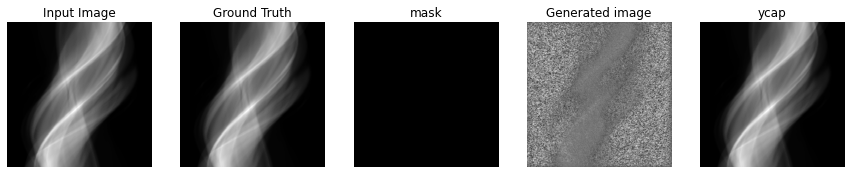

error=0.0
Epoch:  3
...........

KeyboardInterrupt: ignored

In [53]:
test_dataset=train_dataset
fit(train_dataset, EPOCHS, test_dataset)

In [ ]:
#saving of the model if using google colab
#tf.keras.models.save_model(
 #   generator, 'modelproj.h5', overwrite=True, include_optimizer=True, save_format=None,
 #   signatures=None, options=None, save_traces=True)
#files.download('modelproj.h5')

In [ ]:
#saving the loss on tensorboard 
#!tensorboard dev upload --logdir  {log_dir}   --name "modelproj23"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>